# Linear Models (Continued) <a href="https://colab.research.google.com/github/burakai/ENGR4450/blob/main/2_linear-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Example 1: (Example 6 from previous notebook) Bad Fit*

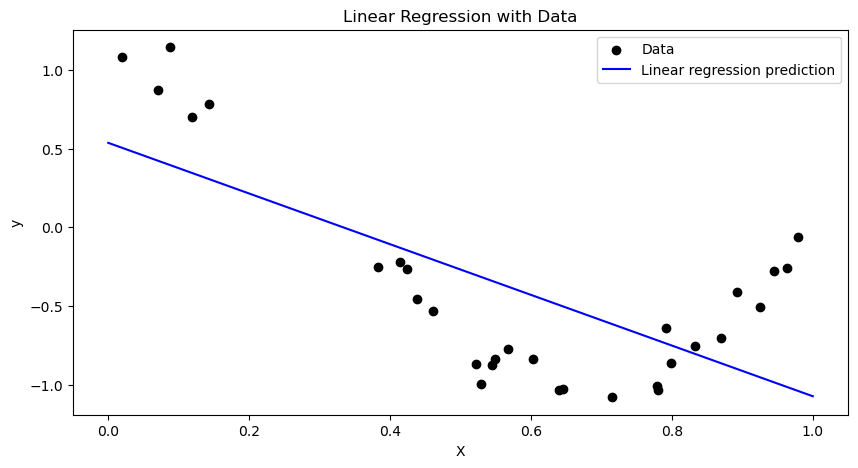

R2 Score: 0.4736796287494851


In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

model = LinearRegression()
    
model.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = model.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = model.score(X[:, np.newaxis], y)
print("R2 Score:", score)

Given this observation, one potential solution from a statistical standpoint is to explore more flexible models, such as polynomial regression or non-linear approaches, to better capture the data's curvature.

Before extending the linear model with polynomial features, we will introduce the scikit-learn Pipeline class.

## Introducing `Pipeline` in `Scikit-learn`

**What is a Pipeline?**

In machine learning, a pipeline helps streamline the process of transforming data and training models by combining multiple steps into a single object.

A pipeline ensures that these steps are executed in the correct order and can be treated as a single unit, which is especially useful for cross-validation and grid search.

**A typical pipeline includes:**

- Data preprocessing steps (e.g., scaling, encoding, feature extraction)
- Model training (e.g., linear regression, decision trees)

**Key Advantages of Using Pipelines:**

- Simplifies Workflow: A pipeline combines various steps (data transformation, model training) into a single object. This makes it easier to handle complex workflows.
- Prevents Data Leakage: By ensuring that data transformations are applied only to training data during cross-validation, pipelines help avoid data leakage, which can lead to overly optimistic performance estimates.
- Hyperparameter Tuning: Pipelines make it easier to search over a range of hyperparameters, including those related to preprocessing and model training, using tools like GridSearchCV or RandomizedSearchCV.

A scikit-learn pipeline is constructed as a sequence of steps.

Each step except the last must be a transformer (i.e., an object that implements the fit and transform methods), and the last step must be an estimator (i.e., an object that implements the fit and predict methods).

### Pipeline Examples
#### Simple Pipeline


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ("preprocessing", StandardScaler()),
    ("classifier", LinearRegression()),
]
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LinearRegression())])

#### Setting Config for Displaying Pipelines

In [2]:
from sklearn import set_config

set_config(display="text")
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LinearRegression())])

#### Adding An Element to Pipeline

In [3]:
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

set_config(display="diagram")

steps = [
    ("standard_scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=3)),
    ("classifier", LinearRegression()),
]
    
pipe = Pipeline(steps)
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('classifier', LinearRegression())])

The `make_pipeline` function in scikit-learn is a shorthand for creating a pipeline without needing to name each step explicitly, automatically assigning names based on the estimators provided, making the code more concise.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### You Can Create More Complex Pipelines

In [5]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

---

### *Example 2: Extending Linear Regression with Polynomial Features (a.k.a Polynomial Regression)*

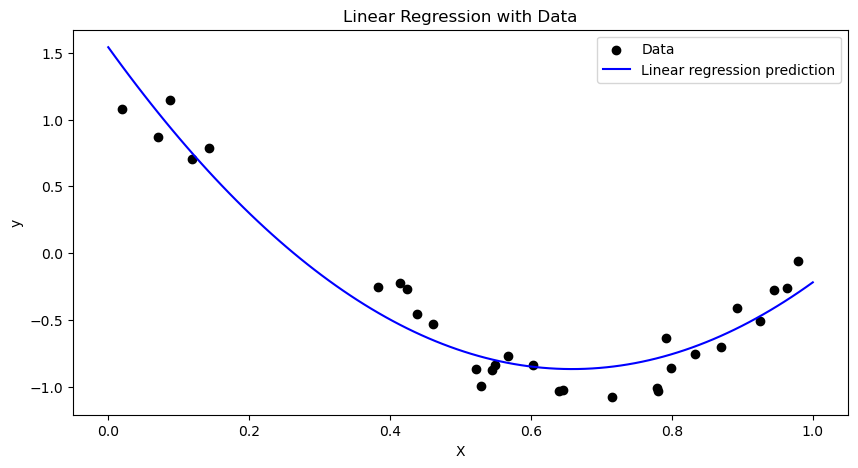

R2 Score: 0.93080078598832


In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
    
    
pipeline.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = pipeline.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = pipeline.score(X[:, np.newaxis], y)
print("R2 Score:", score)

### *Example 3: Polynomoal Regression of Higher Degree*

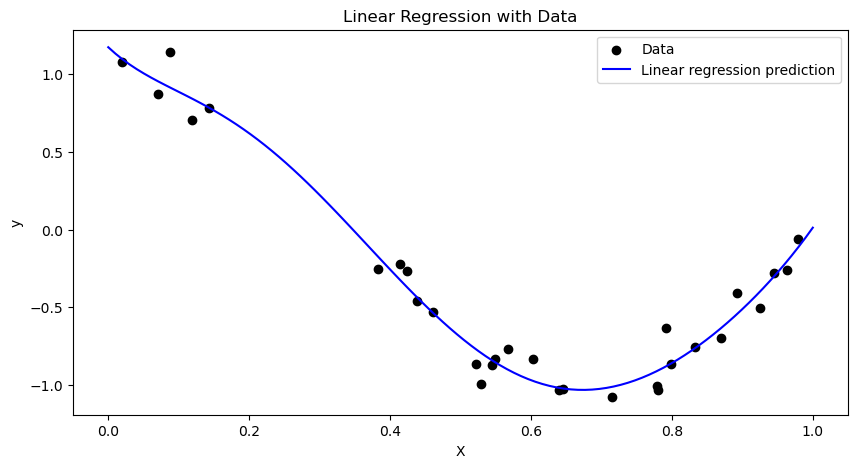

R2 Score: 0.9747297712132054


In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
    
    
pipeline.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = pipeline.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = pipeline.score(X[:, np.newaxis], y)
print("R2 Score:", score)

### *Example 4: Comparison of Different Degrees of Polynomial Regression*

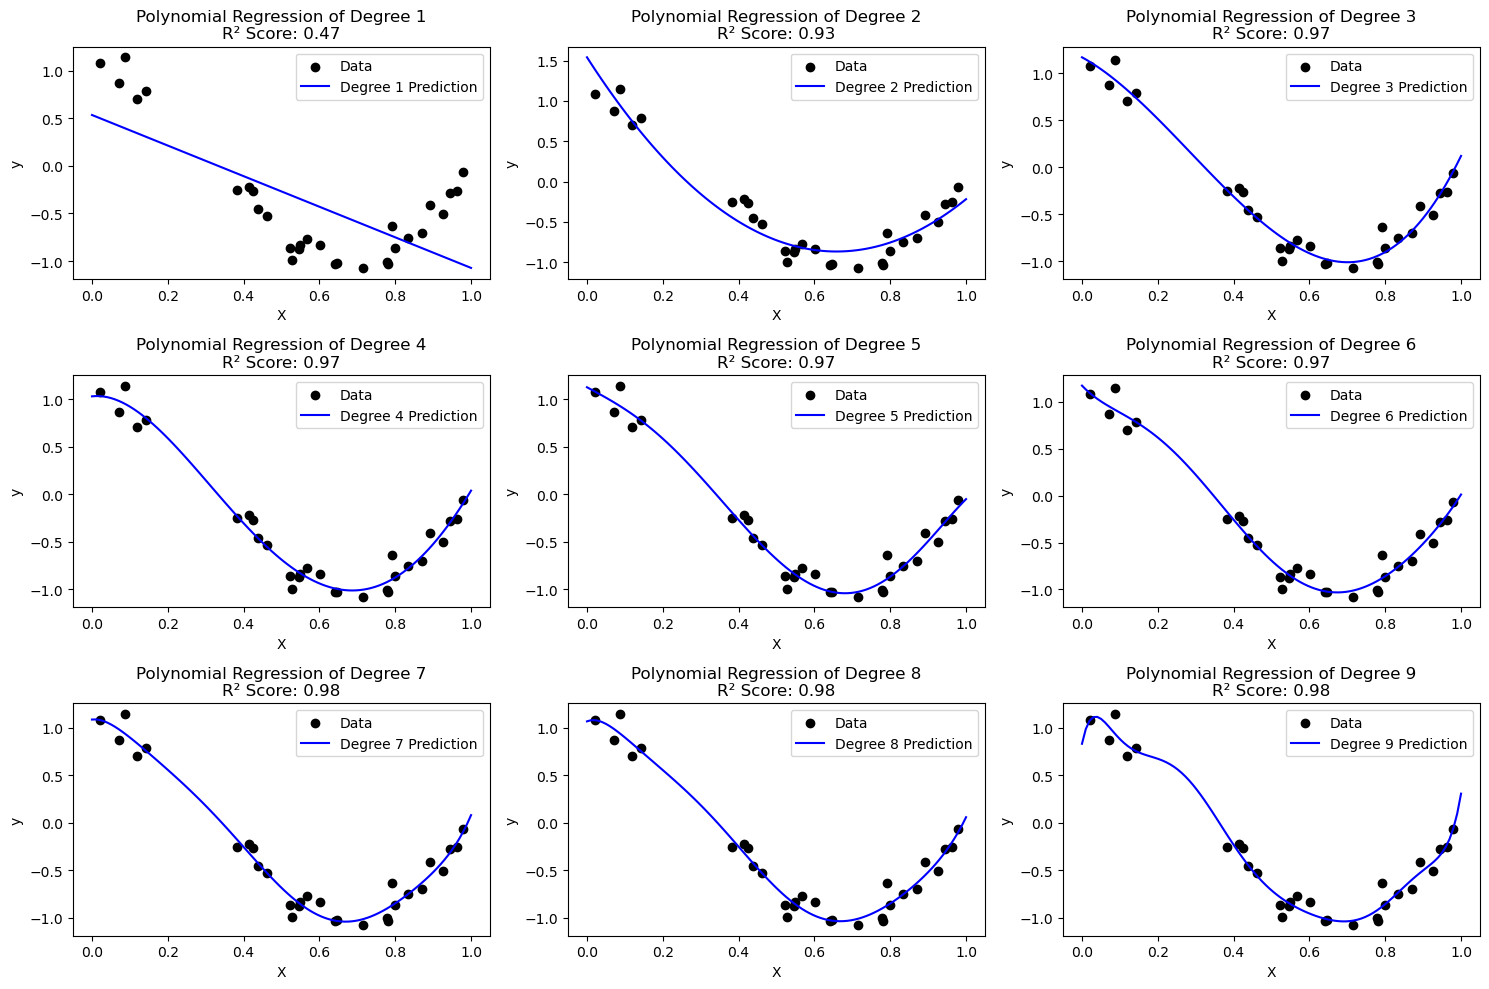

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Prepare the plot
plt.figure(figsize=(15, 10))

# Evaluate models with polynomial degrees from 1 to 7
degrees = range(1, 10)
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()

    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    pipeline.fit(X[:, np.newaxis], y)

    # Plot the model's prediction
    X_plot = np.linspace(0, 1, 100)
    predictions = pipeline.predict(X_plot[:, np.newaxis])
    
    plt.subplot(3, 3, degree)  # Create a subplot for each degree
    plt.scatter(X, y, color='black', label="Data")  # Data points
    plt.plot(X_plot, predictions, color='blue', label=f"Degree {degree} Prediction")  # Prediction

    # Calculate R² score
    score = pipeline.score(X[:, np.newaxis], y)

    # Add labels, title, and R² score
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression of Degree {degree}\nR² Score: {score:.2f}')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Is higher degree always better?**

Not necessarily! While higher-degree polynomial models can fit the training data more closely, they also come with some potential drawbacks:

1. **Overfitting**: Higher-degree polynomials can capture noise in the training data rather than the underlying trend. This results in a model that performs well on the training set but poorly on unseen data.

2. **Increased Complexity**: More complex models require more computational resources and can become difficult to interpret.

3. **Extrapolation Issues**: Higher-degree polynomials can lead to erratic predictions outside the range of the training data, creating large swings in predicted values.

4. **Bias-Variance Tradeoff**: While increasing the degree reduces bias (the error due to overly simplistic assumptions), it can increase variance (the error due to sensitivity to small fluctuations in the training set).

---

## Bias vs. Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning and statistical modeling that describes the balance between two sources of error that affect model performance: bias and variance.

### Bias

- **Definition**: Bias refers to the error introduced by approximating a real-world problem, which may be complex, with a simplified model. 
- **Characteristics**:
  - High bias often leads to **underfitting**, where the model cannot capture the underlying trend of the data.
  - Models with high bias are usually too simple (e.g., linear models for non-linear data).
- **Example**: A linear regression model applied to a quadratic relationship will likely yield predictions that deviate significantly from actual values, resulting in high bias error.

### Variance

- **Definition**: Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training data.
- **Characteristics**:
  - High variance often leads to **overfitting**, where the model captures noise in the training data rather than the actual signal.
  - Models with high variance are usually too complex (e.g., high-degree polynomials).
- **Example**: A high-degree polynomial regression model fitted to a small dataset may follow the training data closely but will perform poorly on new, unseen data.

**Tradeoff**

- The tradeoff between bias and variance is crucial for optimizing model performance:
  - **High Bias, Low Variance**: Simple models typically beget high bias but low variance. They can be robust but often fail to capture the complexity of the data.
  - **Low Bias, High Variance**: Complex models generally yield low bias and high variance, being flexible enough to fit training data closely but likely to generalize poorly.
- The goal is to find a sweet spot where both bias and variance are minimized, thus achieving good generalization on unseen data.

Effective model selection and tuning often involve managing the bias-variance tradeoff. Techniques such as cross-validation, regularization, and ensemble methods can help balance these two sources of error to enhance model performance.


## Underfitting vs. Overfitting

Understanding underfitting and overfitting is crucial for building effective machine learning models. Both scenarios reflect different modeling errors that can lead to poor performance.

### Underfitting

- **Definition**: Underfitting occurs when a model is too simple to capture the underlying pattern of the data. It results in high bias and low variance.
- **Characteristics**:
  - The model performs poorly on both the training and validation datasets.
  - Commonly caused by using overly simplistic models or insufficient training (e.g., too few features).
- **Example**: Using a linear regression model to fit a dataset that follows a complex, non-linear relationship will likely lead to underfitting, as the model cannot capture the trends.

### Overfitting

- **Definition**: Overfitting occurs when a model learns not only the underlying pattern but also the noise in the training data. This results in high variance and low bias.
- **Characteristics**:
  - The model performs well on the training dataset but poorly on the validation/testing datasets.
  - Commonly caused by using overly complex models or insufficient training data.
- **Example**: A high-degree polynomial regression model fitting a small dataset may pass through every data point but fails to generalize to new, unseen data.

**Balancing Underfitting and Overfitting**

- **Goal**: The primary goal in machine learning is to find a balance between underfitting and overfitting to enhance model generalization.
- **Strategies**:
  - **Cross-Validation**: Using techniques like k-fold cross-validation to assess model performance more accurately.
  - **Regularization**: Applying methods such as Lasso or Ridge regression to control model complexity.
  - **Feature Selection**: Identifying and selecting important features, reducing noise that might lead to overfitting.

Effectively managing underfitting and overfitting is essential for building robust machine learning models. By employing suitable techniques and monitoring model performance, practitioners can achieve optimal generalization to unseen data.


In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Set random seed for reproducibility
np.random.seed(0)

# Generate data
n_samples = 30
degrees = [1, 4, 15]

# Create a figure to display the results
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [20]:
# Create polynomial regression models for each degree
def create_polynomial_regression(degrees):
    polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    return pipeline

In [21]:
# Display the models
for i in range(len(degrees)):
    pipeline = create_polynomial_regression(degrees[i])
    display(pipeline)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

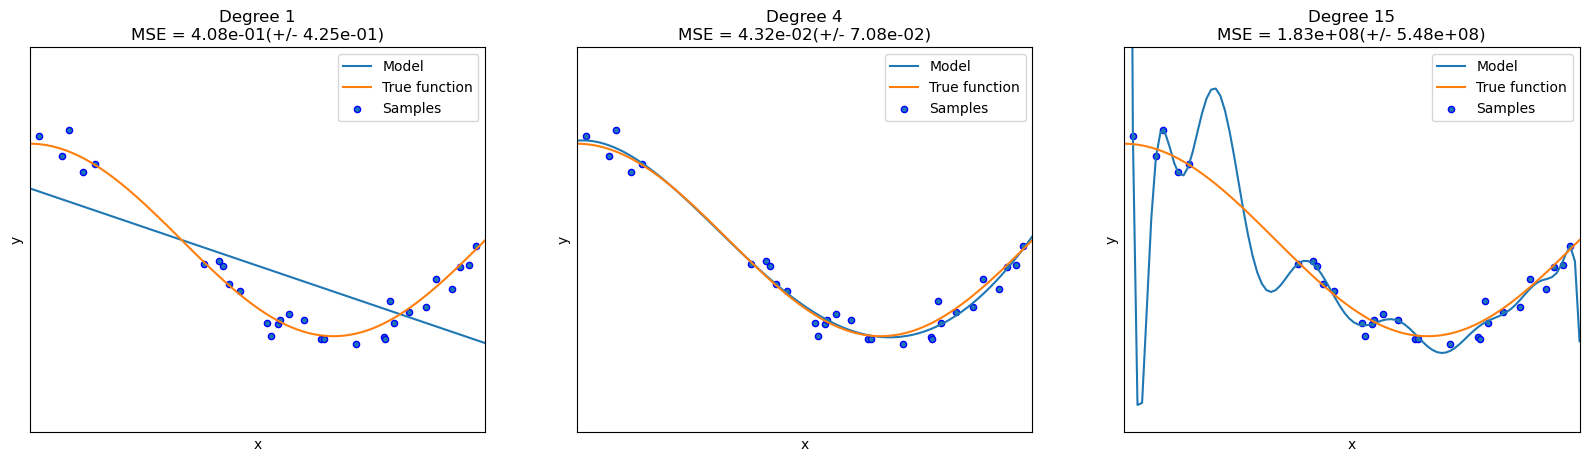

In [22]:
# Plot the results
plt.figure(figsize=(20, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    pipeline = create_polynomial_regression(degrees[i])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

A balance is typically sought between model complexity and predictive performance.

Techniques such as cross-validation can be useful for selecting an appropriate degree of polynomial regression by evaluating performance on validation data. In many cases, simpler models generalize better to new data.

---

## Bayesian Regression

Bayesian regression is a statistical method that applies Bayesian principles to regression analysis. It estimates the probability distribution of the model parameters, allowing for the quantification of uncertainty in predictions.

The following code demonstrates how to fit a Bayesian Ridge Regression model to a nonlinear function, visualize predictions, and evaluate model uncertainty using confidence intervals. The adjustments in initial parameters help analyze how they impact the performance and fit of the regression model.

- **Import Necessary Libraries**:
   The code imports required libraries: `numpy` for numerical operations, `matplotlib.pyplot` for plotting, and `BayesianRidge` from `sklearn` for modeling.

- **Generate Data**:
   - A function `func(x)` is defined to represent the true underlying function, \( \sin(2 \pi x) \).
   - Training data is generated using a random seed to maintain consistency. Noisy observations are added to the true function.

- **Vandermonde Matrix Creation**:
    - The Vandermonde matrix `X_train` and `X_test` are created to fit polynomial functions. The order of the polynomial is set to 3.

- **Bayesian Ridge Regression**:
   - A `BayesianRidge` model is instantiated. The parameters `alpha` and `lambda` are set for the model, controlling the regularization.

- **Plotting Results**:
   - A loop iterates through two initializations of `alpha` and `lambda` to fit the model and visualize the predicted mean and uncertainty.
   - The true function and noisy observations are plotted alongside the model's predictions and the prediction intervals (confidence intervals).

- Finally, the plot layout is adjusted, and the results are displayed.

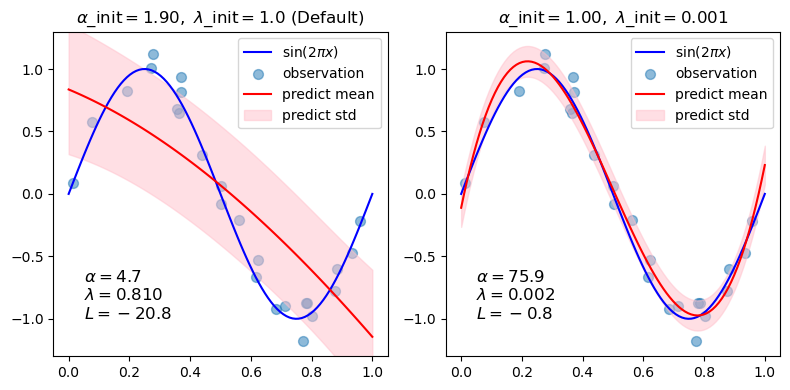

In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import BayesianRidge

# Generate some data
def func(x):
    return np.sin(2 * np.pi * x)


size = 25  # Number of training samples
rng = np.random.RandomState(1234)  # Random number generator
x_train = rng.uniform(0.0, 1.0, size)  # Training input
y_train = func(x_train) + rng.normal(scale=0.1, size=size)  # Noisy output
x_test = np.linspace(0.0, 1.0, 100)  # Test input for predictions


n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

# Bayesian ridge regression 
model = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

# Plot the true and predicted curves with log marginal likelihood (L)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        model.set_params(alpha_init=init[0], lambda_init=init[1])
    model.fit(X_train, y_train)
    ymean, ystd = model.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        model.alpha_, model.lambda_, model.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

---

Some of the regressors are also used as classifiers, showcasing their versatility in machine learning tasks.

For example, models like `LogisticRegression` and `RidgeClassifier` can be employed to categorize data points, while techniques such as `SGDClassifier` cover a range of linear classification algorithms, including support vector machines and logistic regression. This dual functionality highlights the adaptability of these algorithms across different problem domains, making them valuable tools for both regression and classification challenges.

In our upcoming Neural Networks notebook, we will also explore the Perceptron model. As a fundamental component of neural networks, the Perceptron exemplifies essential concepts like decision boundaries and linear separability. 

This discussion will enhance your understanding of how simple linear classifiers can evolve into more complex models, laying the groundwork for advanced machine learning techniques.

**Linear Classifiers**

| Classifier | Description |
|------------|-------------|
| [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) | Logistic Regression (aka logit, MaxEnt) classifier. |
| [`LogisticRegressionCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) | Logistic Regression CV (aka logit, MaxEnt) classifier. |
| [`PassiveAggressiveClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html) | Passive Aggressive Classifier. |
| [`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) | Linear perceptron classifier. |
| [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) | Classifier using Ridge regression. |
| [`RidgeClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html) | Ridge classifier with built-in cross-validation. |
| [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) | Linear classifiers (SVM, logistic regression, etc.) with SGD training. |
| [`SGDOneClassSVM`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html) | Solves linear One-Class SVM using Stochastic Gradient Descent. |

## Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the goal is to model the probability that a given input belongs to a particular category.

- **Sigmoid Function**: Logistic regression uses the sigmoid function to transform the linear output into a probability value between 0 and 1. The function is defined as:
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
  where \( z \) is the linear combination of input features.

- **Binary Classification**: Logistic regression predicts binary outcomes (e.g., success/failure, yes/no). The output probability is compared to a threshold (commonly 0.5) to classify the observation.

- **Cost Function**: The model uses the log-loss (or binary cross-entropy) as its cost function to measure the difference between the predicted probabilities and the actual outcomes:
  $$
  L(y, \hat{y}) = -\frac{1}{N} \sum (y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}))
  $$

**Model Training**

- **Optimization**: Logistic regression parameters (weights) are typically estimated using optimization techniques such as gradient descent or maximum likelihood estimation.

**Advantages**

- **Interpretability**: The coefficients in logistic regression can be interpreted as the change in the log-odds of the outcome for a one-unit increase in the predictor variable.
  
- **Probabilistic Output**: Provides probabilities that help in understanding the confidence of predictions.

- **Robustness**: Works well with binary outcomes and is less prone to overfitting with proper regularization.

**Limitations**

- **Linearity Assumption**: Assumes a linear relationship between the independent variables and the log-odds of the dependent variable. It may underperform if the relationship is highly non-linear without feature transformations.

- **Limited to Binary Outcomes**: Standard logistic regression is designed for binary classification, though extensions exist for multi-class problems (e.g., multinomial logistic regression).

Logistic regression is widely used in various fields, including:

- Medicine (e.g., predicting disease presence)
- Marketing (e.g., customer churn analysis)
- Finance (e.g., credit scoring)


### *Example 5: Logistic Regression*

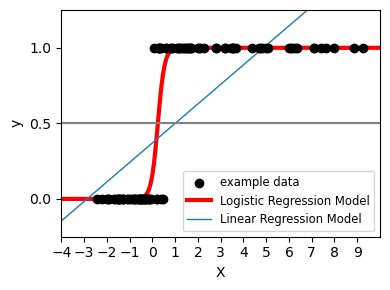

In [24]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

Logistic regression is a powerful and interpretable method for binary classification tasks, providing probabilistic insights and robust performance on various datasets.

You can access additional models and their details in the scikit-learn documentation: [scikit-learn linear model documentation](https://scikit-learn.org/stable/api/sklearn.linear_model.html).